# 1. Importing Required Libraries


In [298]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 2. Loading the Dataset

In [299]:
Diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# 3. Exploratory Data Analysis

In [ ]:
Diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
Diabetes_dataset.shape

(768, 9)

In [ ]:
Diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CONCLUSION :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see SkinThickness is 99 which is out of medical ranges, insulin is 846 which is very high.
So We have to treat outliers.

Find if there is a duplicated data

In [ ]:
Diabetes_dataset.duplicated().sum()

0

Treat the outliers :
1. check for 0 values

In [69]:
print('Glucose column have {} times zero value '.format(Diabetes_dataset[Diabetes_dataset['Glucose'] == 0].shape[0]))
print('BloodPressure column have {} times zero value '.format(Diabetes_dataset[Diabetes_dataset['BloodPressure'] == 0].shape[0]))
print('SkinThickness column have {} times zero value '.format(Diabetes_dataset[Diabetes_dataset['SkinThickness'] == 0].shape[0]))
print('Insulin column have {} times zero value '.format(Diabetes_dataset[Diabetes_dataset['Insulin'] == 0].shape[0]))
print('BMI column have {} times zero value '.format(Diabetes_dataset[Diabetes_dataset['BMI'] == 0].shape[0]))


Glucose column have 5 times zero value 
BloodPressure column have 35 times zero value 
SkinThickness column have 227 times zero value 
Insulin column have 374 times zero value 
BMI column have 11 times zero value 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

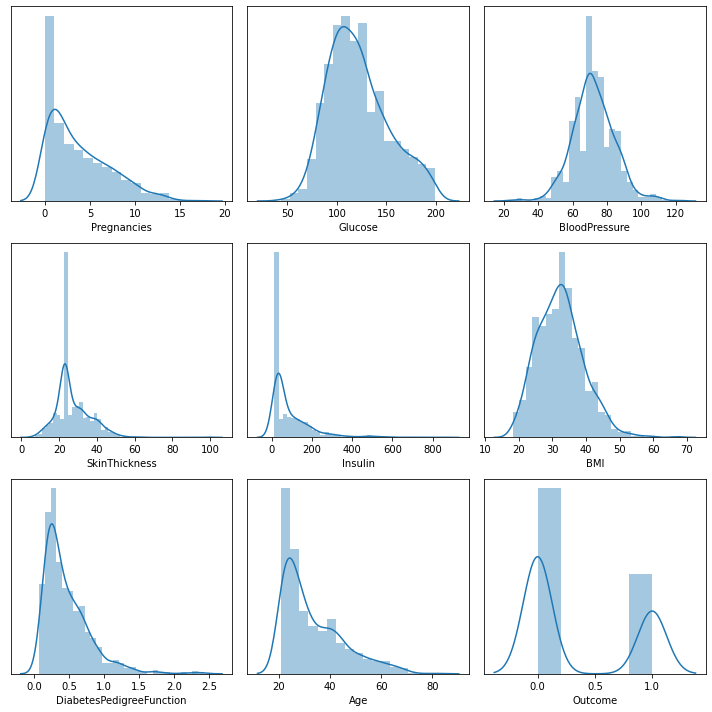

In [ ]:
columns = Diabetes_dataset.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(3,3,i+1)
  plt.yticks([])
  sns.distplot(Diabetes_dataset[columns[i]])
plt.tight_layout()

You may note that the data is skewed in **Insulin** and **Skin thickness** columns. There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values.

So we will use median for skewed columns and mean for normal distribution columns

In [300]:
Diabetes_dataset['Glucose'] = Diabetes_dataset['Glucose'].replace(0, Diabetes_dataset['Glucose'].mean())
Diabetes_dataset['BloodPressure'] = Diabetes_dataset['BloodPressure'].replace(0, Diabetes_dataset['BloodPressure'].mean())
Diabetes_dataset['BMI'] = Diabetes_dataset['BMI'].replace(0, Diabetes_dataset['BMI'].mean())

Diabetes_dataset['Insulin'] = Diabetes_dataset['Insulin'].replace(0, Diabetes_dataset['Insulin'].median())
Diabetes_dataset['SkinThickness'] = Diabetes_dataset['SkinThickness'].replace(0, Diabetes_dataset['SkinThickness'].median())

Find the correlation between the columns

# 4. Data Visualization¶

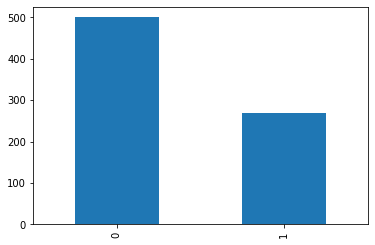

In [ ]:
Diabetes_dataset['Outcome'].value_counts().plot(kind = 'bar')

The Data is imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

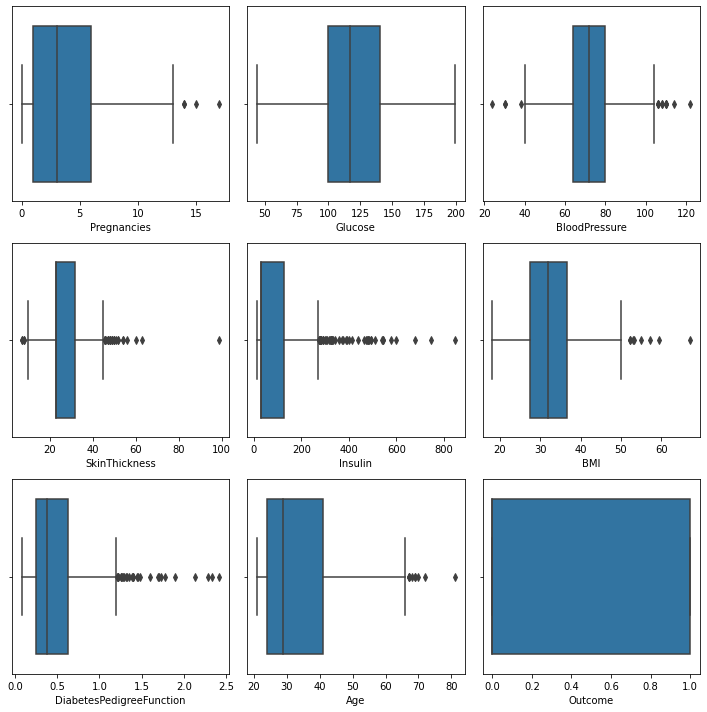

In [ ]:
columns = Diabetes_dataset.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(3,3,i+1)
  plt.yticks([])
  sns.boxplot(Diabetes_dataset[columns[i]])
plt.tight_layout()

There is a lot of outliers needs to be treated

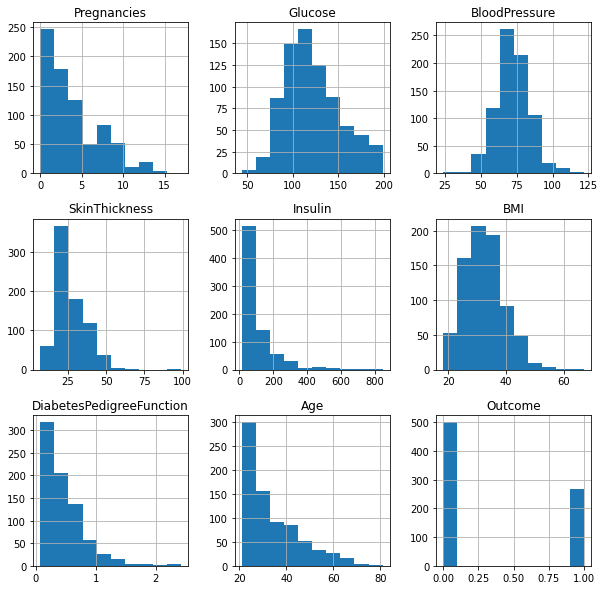

In [72]:
Diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

Only Glucose and bloodpressure are normally distributed, the other data are skewed

# 5. Feature Selection

**Information gain** calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

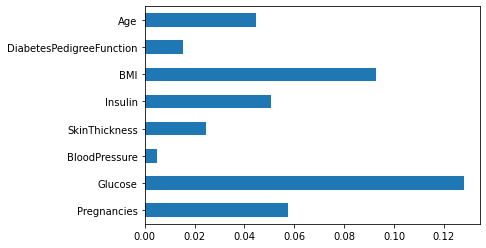

In [251]:
from sklearn.feature_selection import mutual_info_classif
columns = Diabetes_dataset.columns
importances = mutual_info_classif(Diabetes_dataset[columns[:-1]], Diabetes_dataset['Outcome'])
importances = pd.Series(importances, Diabetes_dataset.columns[0 : len(columns) -1])
importances.plot(kind = 'barh')

Blood pressure, Diabetes pedigree Function are less important than the other features

**Correlation** is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

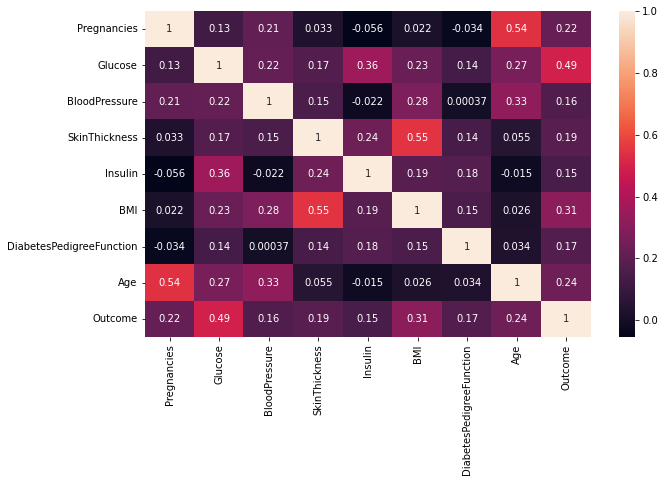

In [180]:
plt.figure(figsize= (10,6))
sns.heatmap(Diabetes_dataset.corr(), annot= True)

we can drop the variable which has a lower correlation coefficient value with the target variable.

Didn't drop Insulin because it has a high information gain 

In [301]:
Diabetes_dataset.drop(['BloodPressure',  'DiabetesPedigreeFunction'], axis = 1, inplace = True)

# 6. Split the data

In [302]:
X = Diabetes_dataset.drop('Outcome', axis = 1)
y = Diabetes_dataset['Outcome']

This classification problems do not have a balanced number of examples for each class label (Due to value counts in visuilization). As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a **stratified** train-test split.

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)

In [304]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


# 7. Handling Outliers

**7.1. Treating with outliers**
- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Below are some of the techniques of detecting outliers

- Boxplots

- Z-score

- Inter Quantile Range(IQR)

Boxplots is used in visualization step

**Compare** the effect of different scalers on data with outliers
- Both StandardScaler and MinMaxScaler are **very sensitive to the presence of outliers.**
- QuantileTransformer provides non-linear transformations **in which distances between marginal outliers and inliers are shrunk**.
- PowerTransformer provides non-linear transformations in which data is mapped to a normal distribution **to stabilize variance and minimize skewness.**

So I'll use QuantileTransformer to treat with the presence of outliers

In [305]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [306]:
df = pd.DataFrame(X_train)
df.columns = Diabetes_dataset.columns[:-1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

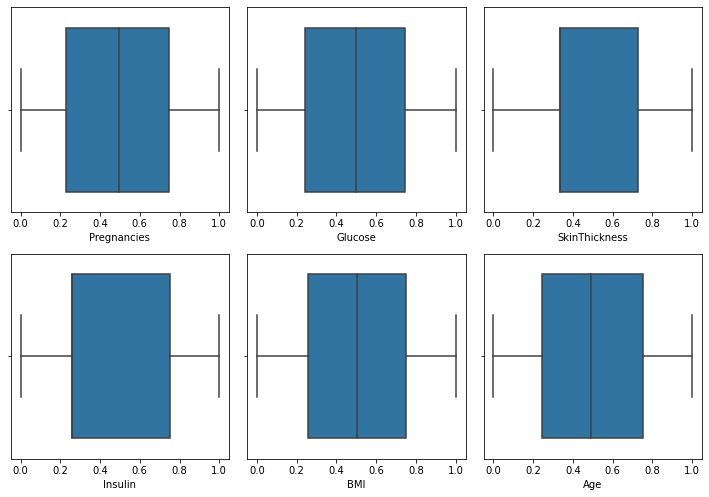

In [307]:
columns = df.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(3,3,i+1)
  plt.yticks([])
  sns.boxplot(df[columns[i]])
plt.tight_layout()

# 8. Model Selection

- 8.1. choose the best model
- 8.2. Hyper Parameter Tuning using GridSearch CV
- 8.3. Fit Best Model
- 8.4. model evaluation using test data
- 8.5. Performance Metrics

**8.1.1. Naive Predictor Performace**
- If we chose a model that always predicted 1 what would that model's accuracy and F-score be on this dataset
- the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

In [308]:
# TN = 0  No predicted negatives in the naive case
# FN = 0  No predicted negatives in the naive case

TP = np.sum(y_train)
FP = y_train.count() - TP

# Calculate accuracy, precision and recall
accuracy = TP / (TP+FP)
recall = TP / TP
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 1.5  # we want to reduce false negative due to diabetes prediction
fscore = (1 + beta) * (precision) / ((beta)**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3485, F-score: 0.4884]


**8.1.2. Implementation - Creating a Training and Predicting Pipeline**
- it's important that to create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [309]:
from sklearn.metrics import accuracy_score, f1_score
from time import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    X_train= X_train[:sample_size]
    y_train = y_train[:sample_size]
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300],predictions_train)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
# Import supplementary visualization code visuals.py

from google.colab import files
src = list(files.upload().values())[0]
open('visuals.py','wb').write(src)
import visuals as vs

**8.1.3. Implementation: Initial Model Evaluation**

GradientBoostingClassifier trained on 6 samples.
GradientBoostingClassifier trained on 61 samples.
GradientBoostingClassifier trained on 614 samples.
SVC trained on 6 samples.
SVC trained on 61 samples.
SVC trained on 614 samples.
LogisticRegression trained on 6 samples.
LogisticRegression trained on 61 samples.
LogisticRegression trained on 614 samples.


/content/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


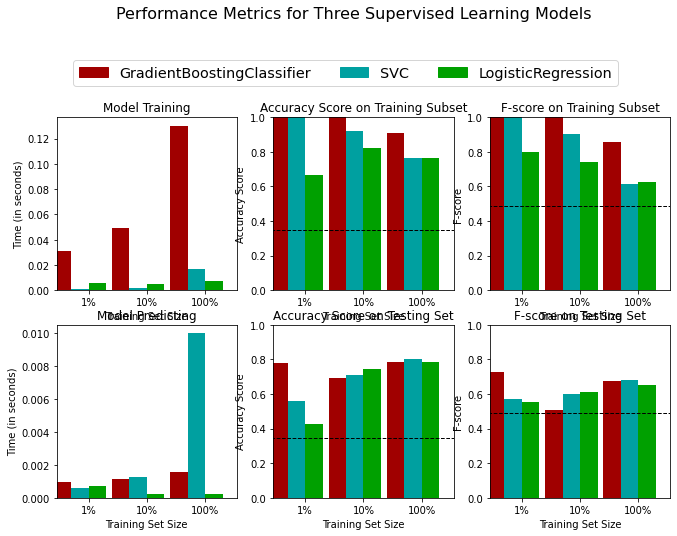

In [311]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

clf_A = GradientBoostingClassifier(random_state = 0)
clf_B = SVC(random_state = 0)
clf_C = LogisticRegression(random_state = 0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = round(0.1 * len(y_train))
samples_1 = round(0.01 * len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

Based on the evaluation performed I choosed GradientBoostingClassifier model because it has the best F-SCORE on the test set

**8.2. Hyper Parameter Tuning using GridSearch CV**

In [322]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer

clf = GradientBoostingClassifier()

parameters = {"learning_rate" : [0.05,0.1,0.3,0.5], "max_depth" : [3,5], "n_estimators" : [64, 100 ,128], "min_samples_leaf" : [1,3,5], 
             "min_samples_split" : [2,4,6]}

scorer = make_scorer(f1_score)

grid = GridSearchCV(estimator = clf, param_grid = parameters,scoring = scorer )

grid_fit = grid.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = clf_A.predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))

Unoptimized model
------
Accuracy score on testing data: 0.7857
F-score on testing data: 0.6733

Optimized Model
------
Final accuracy score on the testing data: 0.8117
Final F-score on the testing data: 0.7010
